Load Train, Val, and Test Datasets into Memory

In [1]:
import pickle
import os
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# File path to processed_dataset
processed_dataset_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v0/processed_dataset.pkl"

with open(processed_dataset_path, "rb") as f:
    processed_dataset = pickle.load(f)
    print("processed_dataset leaded to memory")

final_features = processed_dataset.features

processed_dataset leaded to memory


In [6]:
final_features

,A_player_1_MIN,A_player_1_PTS,A_player_1_AST,A_player_1_TO,A_player_1_PLUS_MINUS,A_player_1_OREB,A_player_1_DREB,A_player_1_PF,A_player_1_FG3_PCT,A_player_1_FG_PCT,...,B_player_8_AST,B_player_8_TO,B_player_8_PLUS_MINUS,B_player_8_OREB,B_player_8_DREB,B_player_8_PF,B_player_8_FG3_PCT,B_player_8_FG_PCT,B_player_8_FT_PCT,Team_A_Wins
GAME_ID,,,,,,,,,,,,,,,,,,,,,
11400001,41.266667,31.0,5.0,1.0,-16.0,1.0,9.0,1.0,0.333,0.476,...,0.0,0.0,-11.0,0.0,0.0,4.0,0.0000,0.6670,0.0,0
11400002,45.083333,18.0,6.0,2.0,2.0,0.0,2.0,2.0,0.500,0.417,...,4.0,2.0,5.0,0.0,0.0,2.0,0.0000,0.4000,0.0,1
11400004,43.200000,6.0,7.0,4.0,-1.0,2.0,16.0,1.0,0.000,0.375,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0
11400005,36.600000,12.0,2.0,1.0,9.0,1.0,7.0,3.0,0.000,0.545,...,1.0,0.0,6.0,0.0,5.0,4.0,0.5000,0.6670,1.0,1
11400006,36.866667,18.0,3.0,5.0,-17.0,2.0,3.0,4.0,0.429,0.389,...,0.0,0.0,13.0,0.0,3.0,4.0,0.0000,0.6000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52100111,32.566667,22.0,0.0,2.0,18.0,0.0,2.0,1.0,1.000,0.538,...,0.0,0.0,-4.0,0.0,0.0,0.0,0.0000,0.0000,0.0,1
52100121,21.316667,13.0,2.0,0.0,-3.0,3.0,0.0,4.0,0.000,0.714,...,2.5,0.5,14.5,0.0,3.0,2.0,0.4165,0.4285,0.5,1
52100131,32.316667,19.0,6.0,3.0,-13.0,3.0,2.0,2.0,0.000,0.533,...,1.0,0.0,-1.0,2.0,2.0,0.0,0.0000,0.5000,1.0,1


In [4]:
team_a_features = final_features.filter(like='A_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()
team_b_features = final_features.filter(like='B_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()
team_a_features.describe()
team_b_features.describe()
team_a_features.info()
team_b_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25445 entries, 11400001 to 52100211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AST         25445 non-null  float64
 1   DREB        25445 non-null  float64
 2   FG3_PCT     25445 non-null  float64
 3   FG_PCT      25445 non-null  float64
 4   FT_PCT      25445 non-null  float64
 5   MIN         25445 non-null  float64
 6   OREB        25445 non-null  float64
 7   PF          25445 non-null  float64
 8   PLUS_MINUS  25445 non-null  float64
 9   PTS         25445 non-null  float64
 10  TO          25445 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 25445 entries, 11400001 to 52100211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AST         25445 non-null  float64
 1   DREB        25445 non-null  float64
 2   FG3_PCT     25445 non-null  f

In [1]:
team_a_features

NameError: name 'team_a_features' is not defined

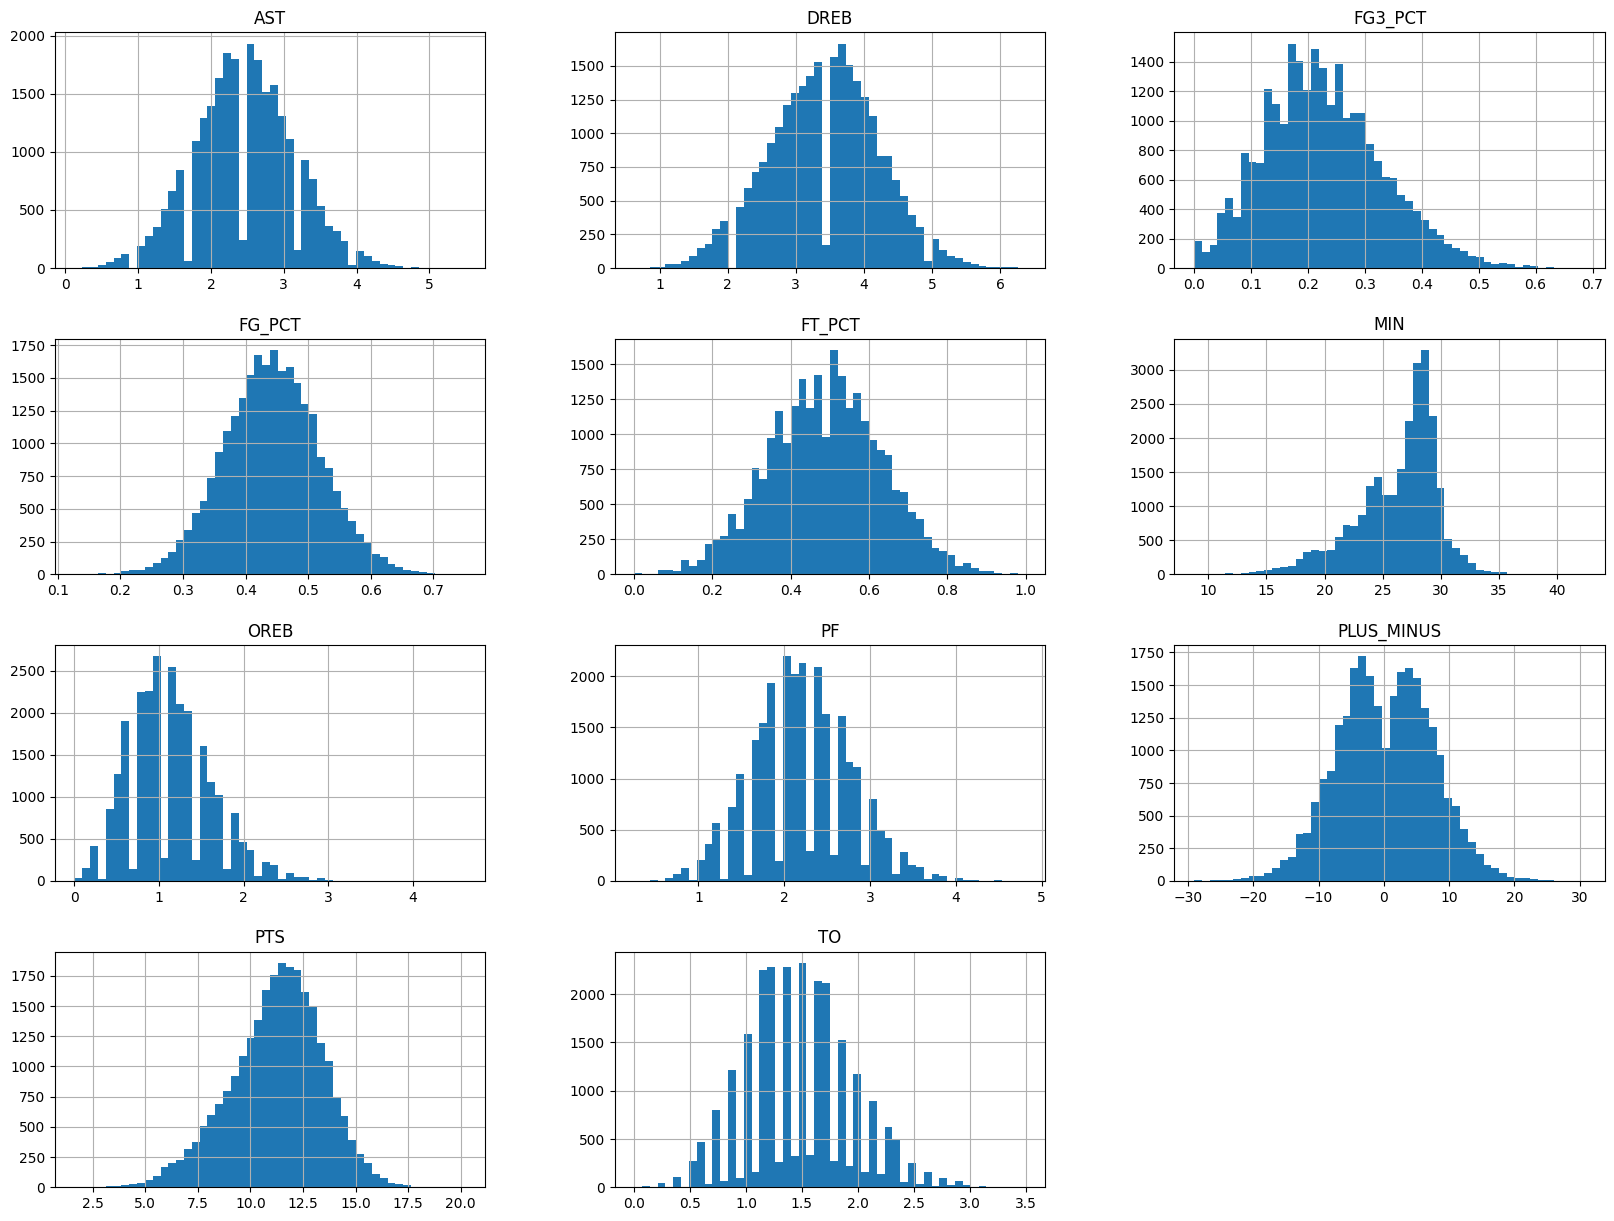

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
team_a_features.hist(bins=50, figsize=(20,15))
plt.show()

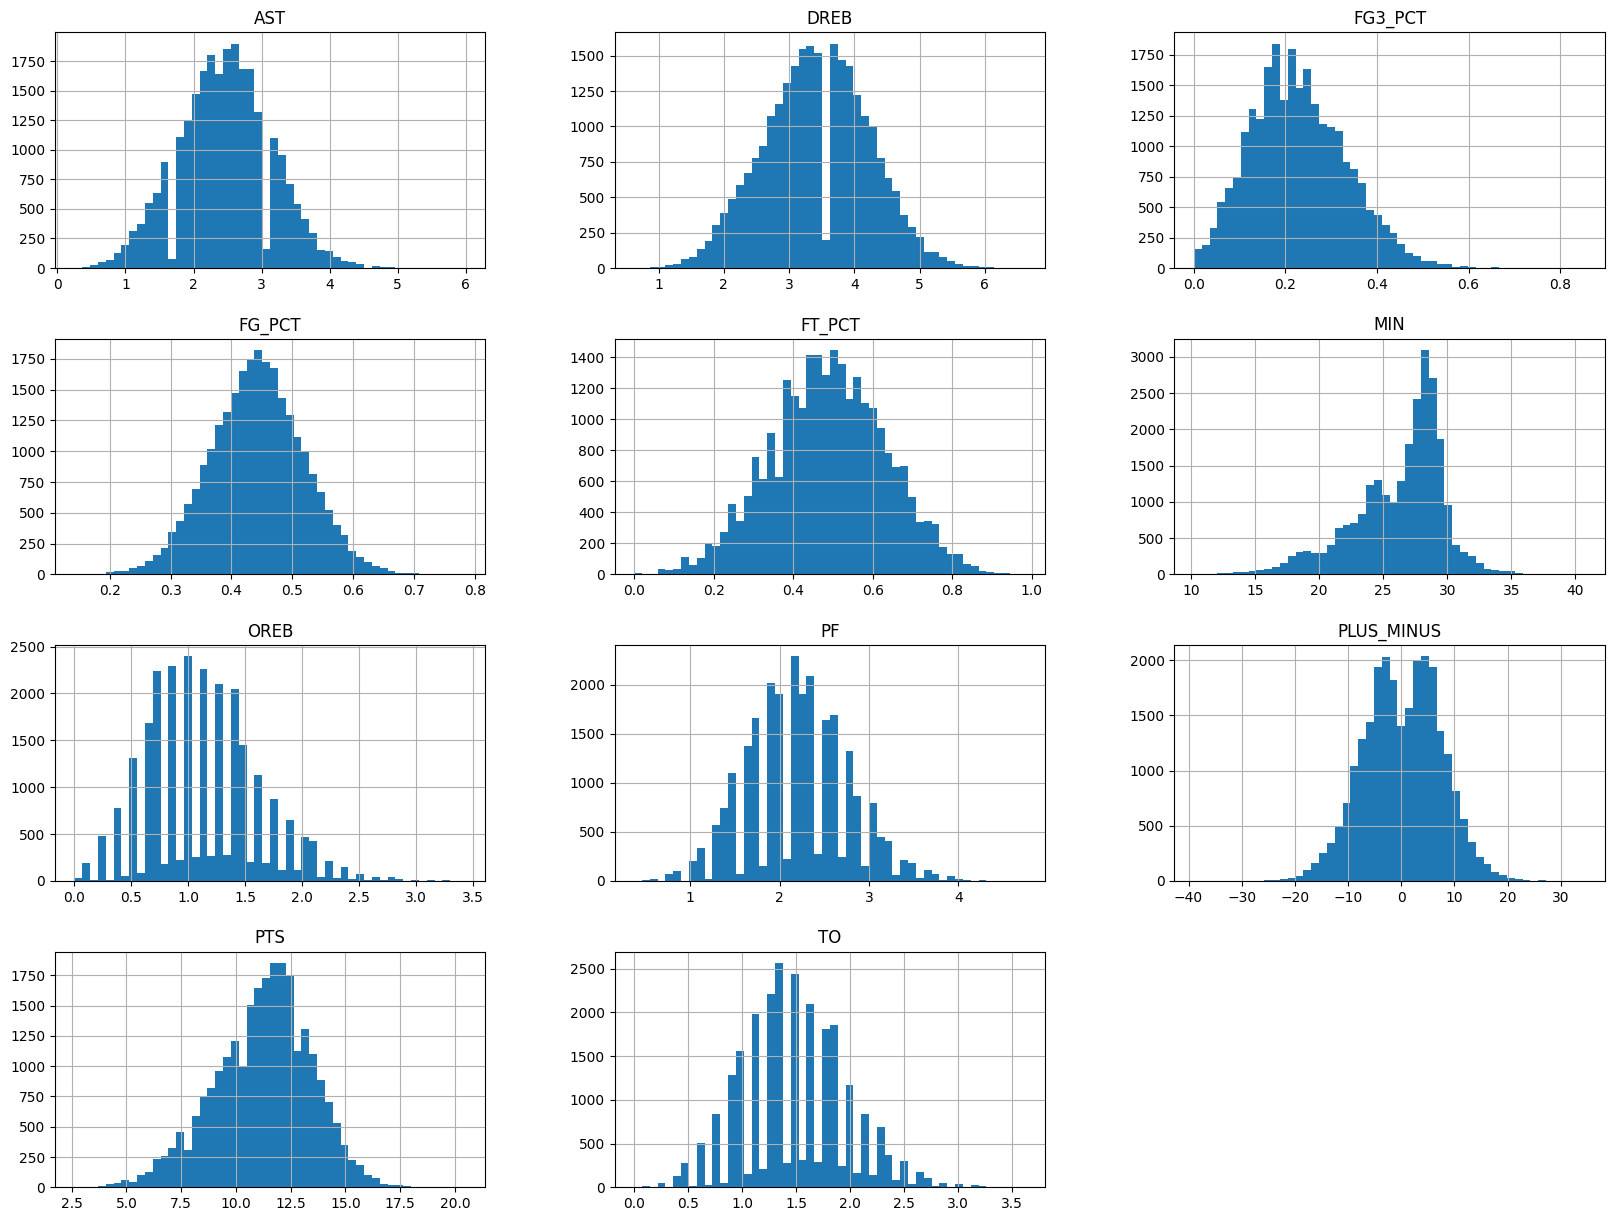

In [60]:
team_b_features.hist(bins=50, figsize=(20,15))
plt.show()

Deprecated (Except Correlation Analysis)

In [19]:
assert all(
    col.startswith(("A_", "B_")) or col == "Team_A_Wins"
    for col in final_features.columns
), "Unexpected columns found in the dataset."
assert final_features["Team_A_Wins"].dtype == "int", "Team_A_Wins must be integer."

assert not final_features.isna().any().any(), "Dataset contains missing values."

In [20]:
assert (
    abs(final_features.filter(like="A_").mean().mean() - final_features.filter(like="B_").mean().mean())
    < .0449
), "Team A and Team B feature distributions are significantly different."
min_columns = [col for col in final_features.columns if col.endswith("_MIN")]
assert final_features[min_columns].min().min() >= 0, "Negative MIN values detected."

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, skew, chi2_contingency
from typing import Dict, Any

def explore_features(dataframe: pd.DataFrame):
    """
    Analyze each feature in the DataFrame and print out its traits.

    For this EDA, averages the features for Team A and Team B to reduce the number of features.

    Args:
        dataframe (pd.DataFrame): Input DataFrame with player-level features.

    Returns:
        Dict: A dictionary containing analysis results for each feature.
    """
    # Aggregate player-level features into team-level averages
    team_a_features = dataframe.filter(like='A_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()
    team_b_features = dataframe.filter(like='B_player').groupby(lambda x: x.split('_', 3)[-1], axis=1).mean()

    # Combine aggregated features with the label
    aggregated_dataframe = pd.concat([
        team_a_features.add_prefix('A_'),
        team_b_features.add_prefix('B_'),
        dataframe[['Team_A_Wins']]
    ], axis=1)

    feature_analysis = {}

    for column in aggregated_dataframe.columns:
        if column == 'Team_A_Wins':
            continue

        print(f"\nAnalyzing feature: {column}")
        feature_data = aggregated_dataframe[column]

        # Initialize results for this feature
        analysis = {}

        # Identify the type
        if feature_data.dtypes == 'object':
            unique_values = feature_data.nunique()
            if unique_values < 0.1 * len(feature_data):
                feature_type = "Categorical"
            else:
                feature_type = "Text"
        elif np.issubdtype(feature_data.dtypes, np.number):
            feature_type = "Numerical"
        else:
            feature_type = "Structured"

        analysis['type'] = feature_type

        # Percentage of values equal to 0
        zero_percentage = (feature_data == 0).mean() * 100
        analysis['zero_percentage'] = zero_percentage

        # Noisiness and type of noise
        if feature_type == "Numerical":
            # Outliers using IQR
            q1, q3 = np.percentile(feature_data.dropna(), [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outlier_percentage = ((feature_data < lower_bound) | (feature_data > upper_bound)).mean() * 100
            analysis['outliers_percentage'] = outlier_percentage
            analysis['noise_type'] = "Outliers" if outlier_percentage > 2 else "Minimal"

        # Distribution type
        if feature_type == "Numerical":
            skewness = skew(feature_data.dropna())
            analysis['skewness'] = skewness

            # normaltest test for normality
            p_value = normaltest(feature_data.dropna())[1]
            if p_value > 0.05:
                distribution_type = "Gaussian"
            else:
                distribution_type = "Non-Gaussian"

            analysis['distribution_type'] = distribution_type

        # Graph the attribute
        plt.figure(figsize=(8, 4))
        if feature_type == "Numerical":
            sns.histplot(feature_data, kde=True, bins=30, color='blue')
            plt.title(f"Distribution of {column}")
        elif feature_type == "Categorical":
            sns.countplot(x=feature_data, palette='viridis')
            plt.title(f"Value Counts for {column}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Correlation metric
        if feature_type == "Numerical":
            correlation_with_others = aggregated_dataframe.corrwith(feature_data)
            analysis['correlation_with_others'] = correlation_with_others.sort_values(ascending=False).to_dict()
        elif feature_type == "Categorical":
            # Cramér's V for categorical correlation
            def cramers_v(x, y):
                contingency_table = pd.crosstab(x, y)
                chi2 = chi2_contingency(contingency_table)[0]
                n = contingency_table.sum().sum()
                return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

            categorical_cols = aggregated_dataframe.select_dtypes(include=['object']).columns
            cramer_v_scores = {}
            for cat_col in categorical_cols:
                if cat_col != column:
                    cramer_v_scores[cat_col] = cramers_v(feature_data, aggregated_dataframe[cat_col])
            analysis['correlation_with_others'] = cramer_v_scores

        feature_analysis[column] = analysis

        # Print analysis
        for key, value in analysis.items():
            if isinstance(value, dict):
                print(f"  {key}: {{...}} (dictionary of length {len(value)})")
            else:
                print(f"  {key}: {value}")

    return feature_analysis


Analyzing feature: A_AST


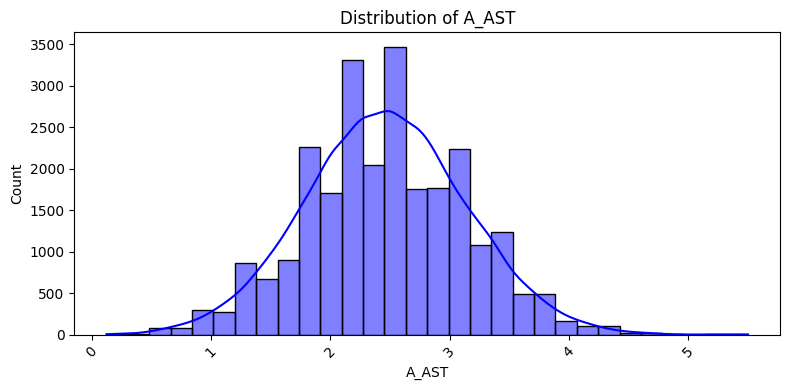

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.9667911180978581
  noise_type: Minimal
  skewness: 0.03941351398979276
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_DREB


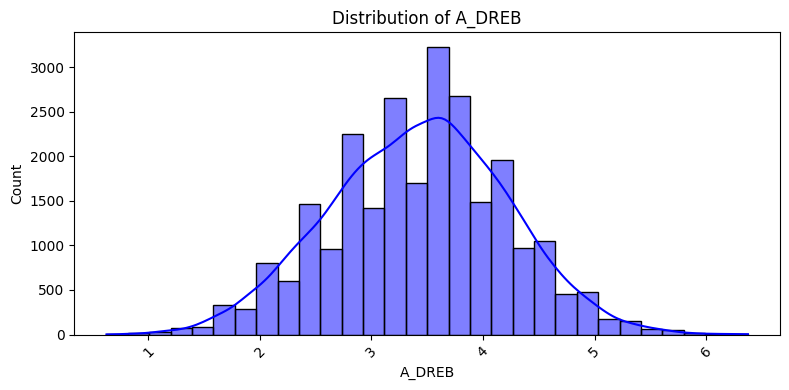

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.34191393201021814
  noise_type: Minimal
  skewness: -0.04512855355100934
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_FG3_PCT


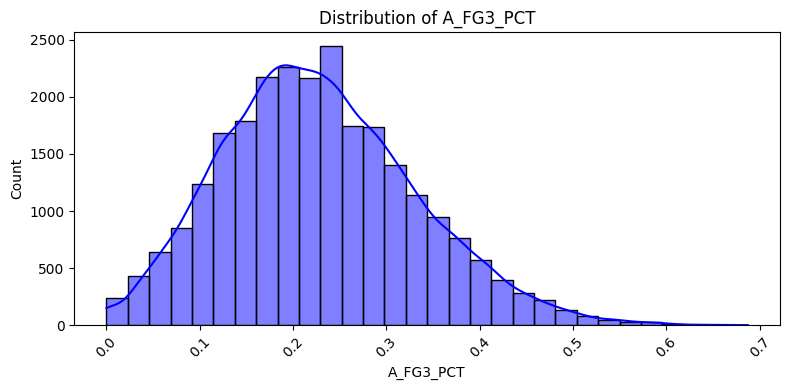

  type: Numerical
  zero_percentage: 0.7113381803890745
  outliers_percentage: 0.9589310277068186
  noise_type: Minimal
  skewness: 0.4094152235516271
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_FG_PCT


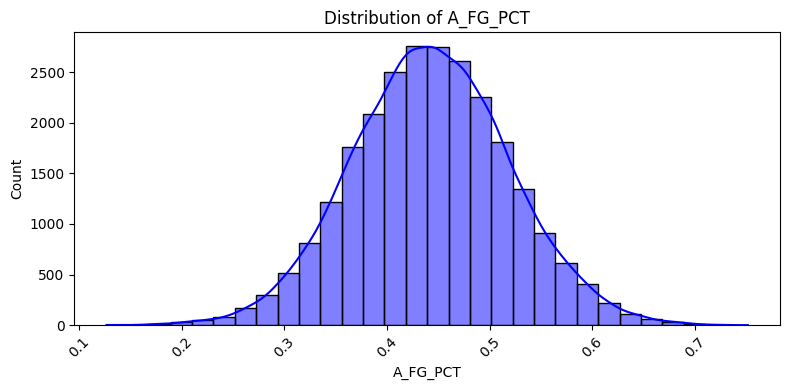

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.923560620947141
  noise_type: Minimal
  skewness: 0.012905671121439699
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_FT_PCT


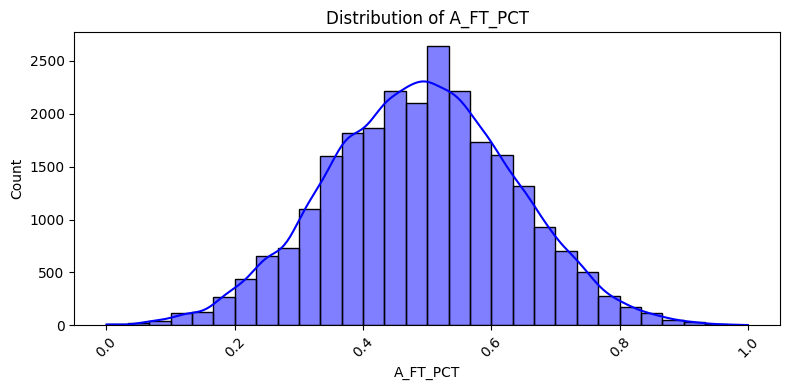

  type: Numerical
  zero_percentage: 0.039300451955197484
  outliers_percentage: 0.41658479072509336
  noise_type: Minimal
  skewness: -0.01110010582644982
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_MIN


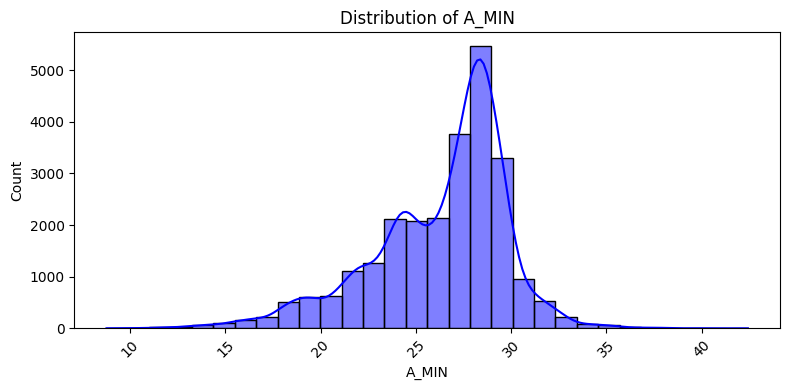

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 2.4444881116132833
  noise_type: Outliers
  skewness: -0.8895568913889349
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_OREB


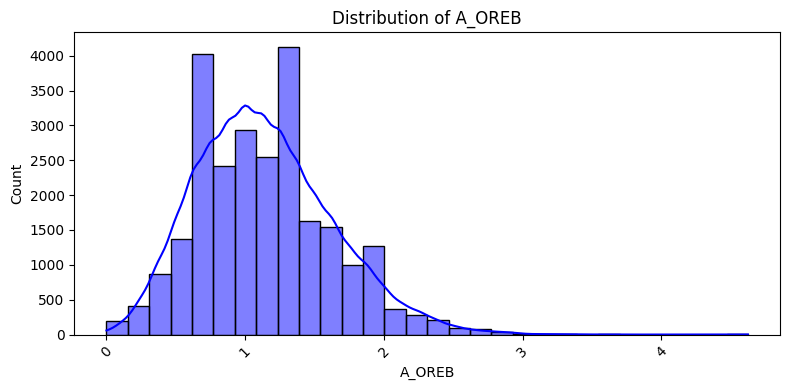

  type: Numerical
  zero_percentage: 0.14934171742975044
  outliers_percentage: 0.9550009825112988
  noise_type: Minimal
  skewness: 0.5263219303027094
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_PF


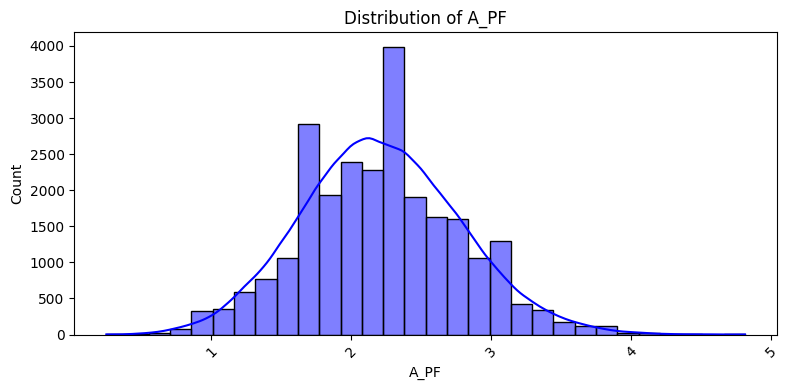

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.5777166437414031
  noise_type: Minimal
  skewness: 0.15838667238818233
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_PLUS_MINUS


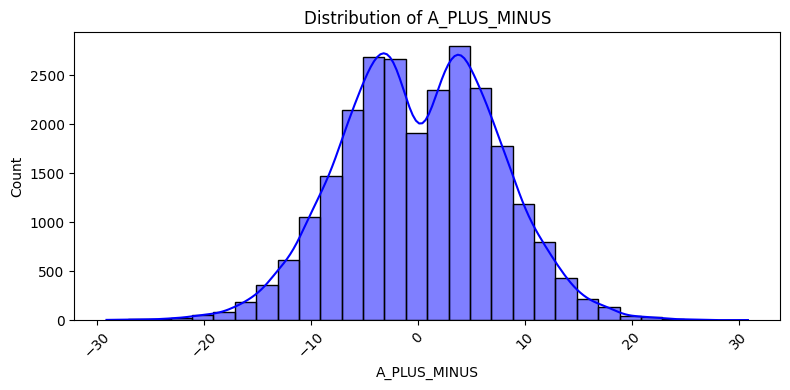

  type: Numerical
  zero_percentage: 0.3812143839654156
  outliers_percentage: 0.45195519748477103
  noise_type: Minimal
  skewness: -0.028688554244590644
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_PTS


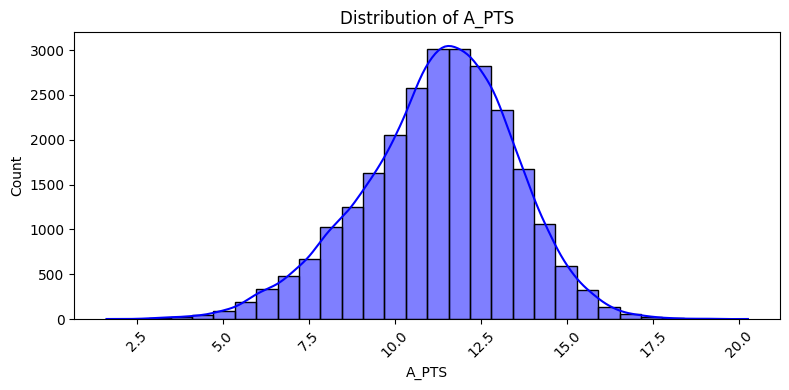

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 1.0964826095500098
  noise_type: Minimal
  skewness: -0.3540978362671473
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: A_TO


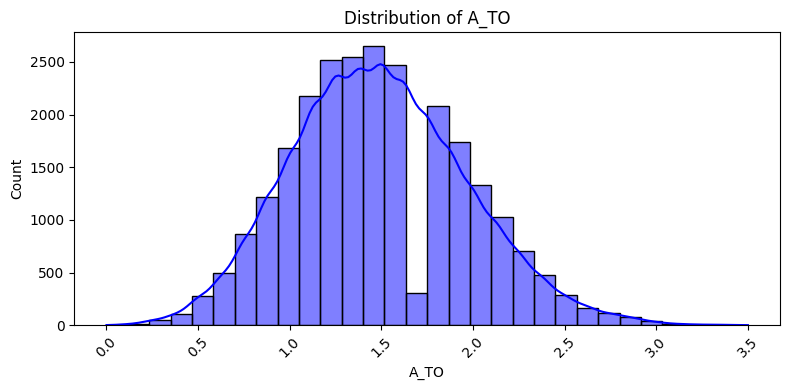

  type: Numerical
  zero_percentage: 0.003930045195519748
  outliers_percentage: 0.9943014344664963
  noise_type: Minimal
  skewness: 0.2609346464283353
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_AST


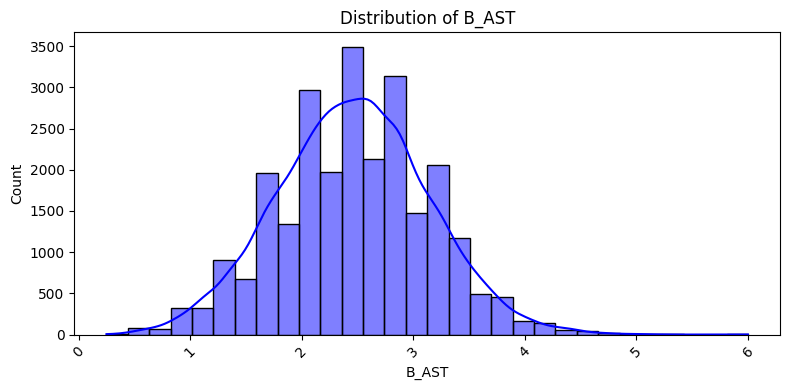

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 1.0257417960306543
  noise_type: Minimal
  skewness: 0.06268690828359036
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_DREB


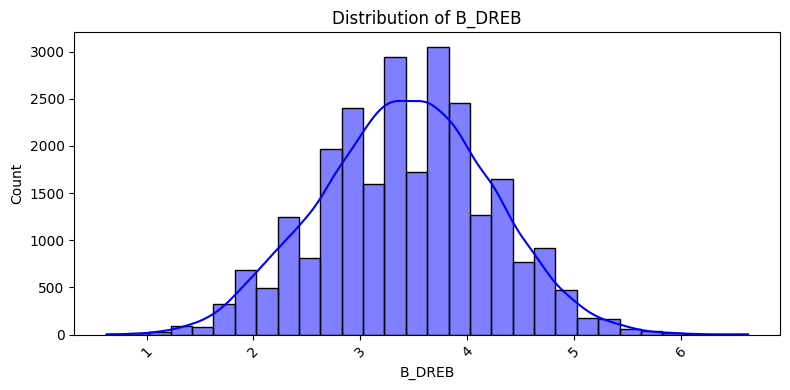

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.30261348005502064
  noise_type: Minimal
  skewness: -0.03213472617316233
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_FG3_PCT


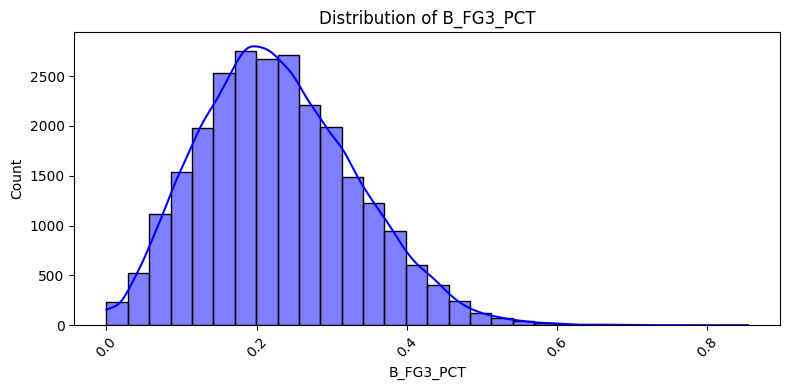

  type: Numerical
  zero_percentage: 0.6209471408921202
  outliers_percentage: 0.6759677736293968
  noise_type: Minimal
  skewness: 0.4068214224561321
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_FG_PCT


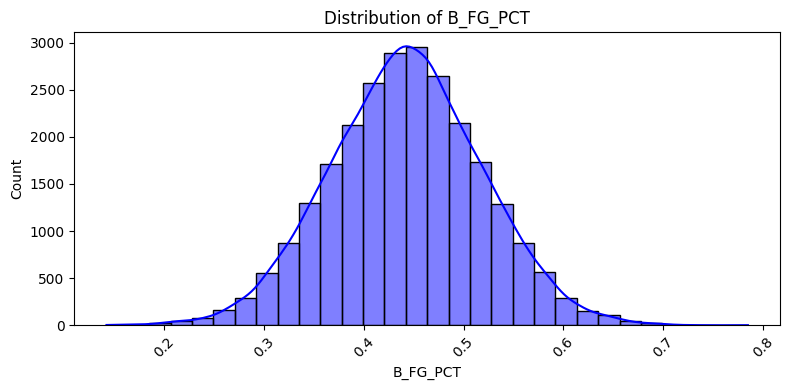

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.9078404401650619
  noise_type: Minimal
  skewness: -0.0035889431648099307
  distribution_type: Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_FT_PCT


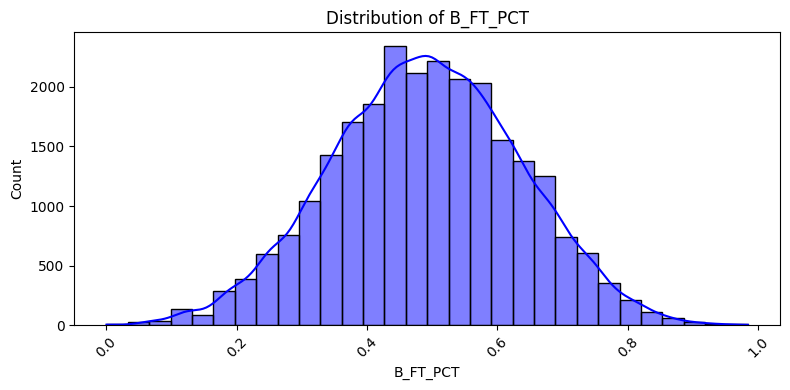

  type: Numerical
  zero_percentage: 0.027510316368638238
  outliers_percentage: 0.3733542935743761
  noise_type: Minimal
  skewness: -0.035895736318989006
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_MIN


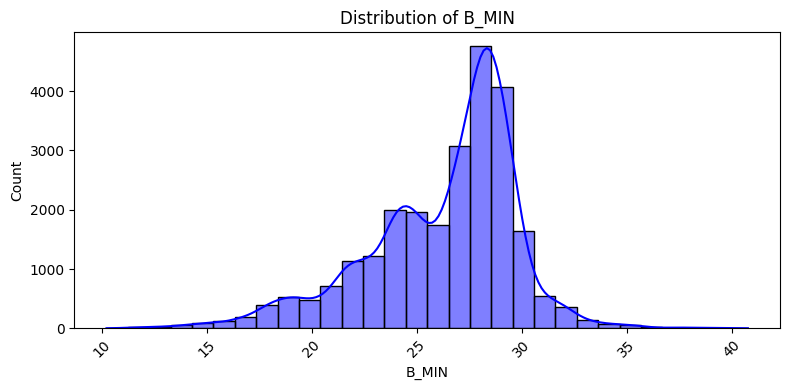

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 2.3658872077028885
  noise_type: Outliers
  skewness: -0.835060395744843
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_OREB


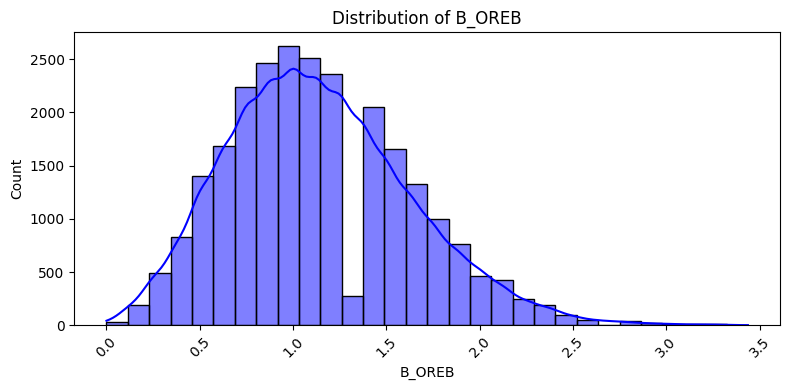

  type: Numerical
  zero_percentage: 0.1218314010611122
  outliers_percentage: 0.8921202593829829
  noise_type: Minimal
  skewness: 0.4912442750442468
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_PF


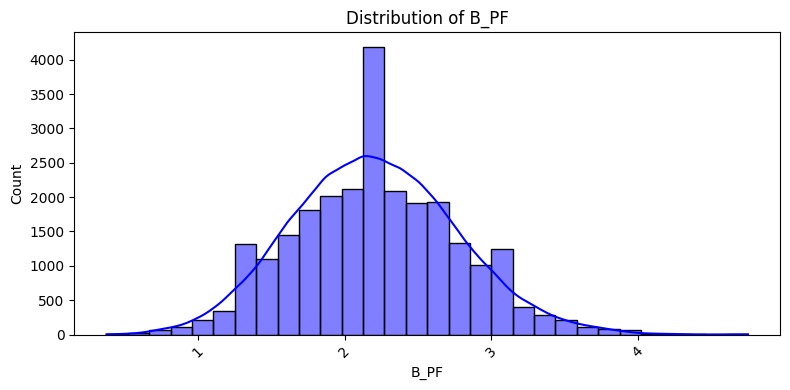

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 0.3733542935743761
  noise_type: Minimal
  skewness: 0.17739227162992827
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_PLUS_MINUS


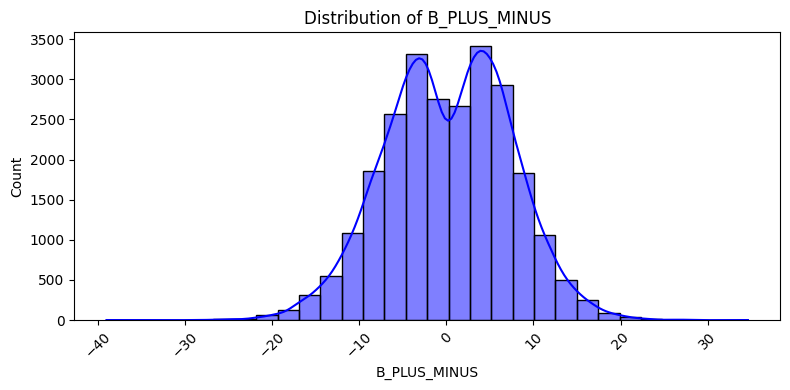

  type: Numerical
  zero_percentage: 0.32619375122813915
  outliers_percentage: 0.3340538416191786
  noise_type: Minimal
  skewness: -0.07906616975898756
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_PTS


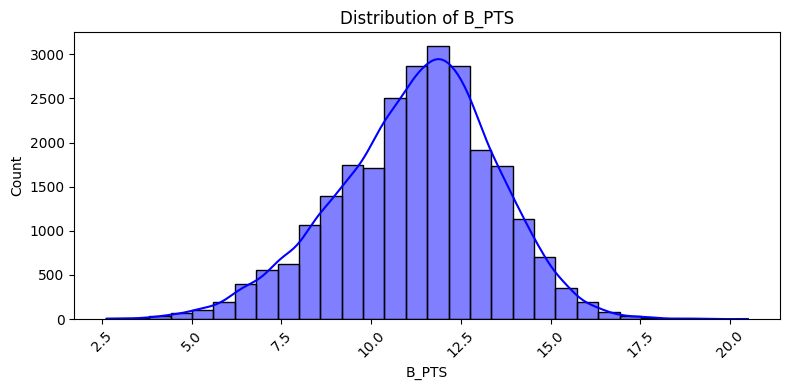

  type: Numerical
  zero_percentage: 0.0
  outliers_percentage: 1.0925525643544902
  noise_type: Minimal
  skewness: -0.3129897321009472
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)

Analyzing feature: B_TO


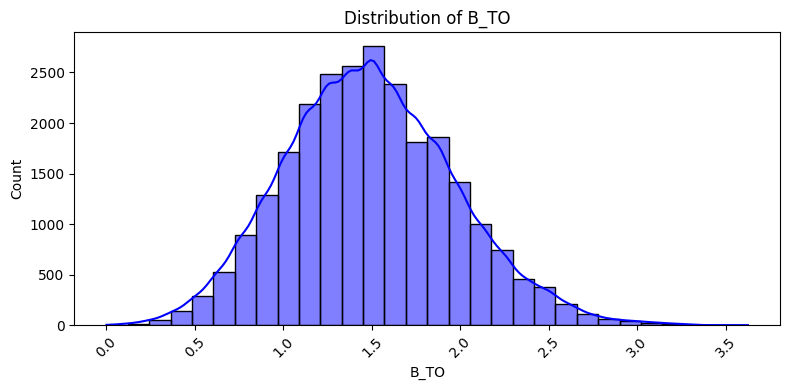

  type: Numerical
  zero_percentage: 0.011790135586559246
  outliers_percentage: 1.0060915700530555
  noise_type: Minimal
  skewness: 0.25188645000938376
  distribution_type: Non-Gaussian
  correlation_with_others: {...} (dictionary of length 23)


In [8]:
feature_analysis = explore_features(final_features)

Correlation Analysis

In [9]:
print("Correlation analysis: printing feature pairs with more than 0.8 correlation coefficient.")
# Use a set of frozensets to store symmetric pairs without duplication
correlations = set()

for columns in feature_analysis.keys():
    for correlation in feature_analysis[columns]["correlation_with_others"].keys():
        if feature_analysis[columns]["correlation_with_others"][correlation] >= 0.8 and columns != correlation:
            # Add the pair as a frozenset (unordered, avoids duplicates)
            correlations.add(frozenset([columns, correlation]))
        

for pair in correlations:
    print(pair)

print("Complete")

Correlation analysis: printing feature pairs with more than 0.8 correlation coefficient.
Complete
